# Imports libraries

In [1]:
import pandas as pd
import matplotlib
import numpy

# Read files and concatenate in a single DataSet

In [2]:
list_df = []
df = pd.read_csv('Files\\despesa_ceaps_2008.csv', encoding='ISO-8859-1', sep=';', skiprows=1)
list_df.append(df)
df = pd.read_csv('Files\\despesa_ceaps_2009.csv', encoding='ISO-8859-1', sep=';', skiprows=1)
list_df.append(df)

for i in range(10, 23):
    df = pd.read_csv('Files\\despesa_ceaps_20' + str(i) + '.csv', encoding='ISO-8859-1', sep=';', skiprows=1)
    list_df.append(df)

dataset = pd.concat(list_df, axis=0, join='outer', ignore_index=False, keys=None, sort=False, copy=True)
dataset.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008111e+12


# Checking for doubles and nulls

In [3]:
dataset.info()
print("\nDoubles:", dataset.duplicated().sum())
print("Nulls:", dataset.isna().all(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
Index: 317962 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317962 non-null  int64  
 1   MES                317962 non-null  int64  
 2   SENADOR            317962 non-null  object 
 3   TIPO_DESPESA       317962 non-null  object 
 4   CNPJ_CPF           314818 non-null  object 
 5   FORNECEDOR         314818 non-null  object 
 6   DOCUMENTO          293152 non-null  object 
 7   DATA               314818 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317962 non-null  object 
 10  COD_DOCUMENTO      317960 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 29.1+ MB

Doubles: 0
Nulls: 0


# Formatting COD_DOCUMENTO column

In [4]:
dataset['COD_DOCUMENTO'] = dataset['COD_DOCUMENTO'].astype('string').str.strip('.0')
dataset.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008110814004


# Converts VALOR_REEMBOLSADO column to float

In [5]:
dataset['VALOR_REEMBOLSADO'] = dataset['VALOR_REEMBOLSADO'].str.replace(',','.').str.replace('\r\n','').astype('float')
dataset.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,386.60,2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,2610.68,2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008110814004


# Corrects DATA column

In [6]:
dataset['DATA'] = dataset['DATA'].str.replace(';','')
dataset['DATA'] = dataset['DATA'].str[-10:]

lista = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dataset_corrected = dataset[(dataset['DATA'].str.split('/').str[-1].isin(lista)) | (dataset['DATA'].isna())]

dataset_corrected['DATA'] = pd.to_datetime(dataset_corrected['DATA'], dayfirst= True, format="%d/%m/%Y")

dataset_corrected.info()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,386.60,2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,2610.68,2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2008110814004
...,...,...,...,...,...,...,...,...,...,...,...
16777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
16778,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
16779,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
16780,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


<class 'pandas.core.frame.DataFrame'>
Index: 317790 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                317790 non-null  int64         
 1   MES                317790 non-null  int64         
 2   SENADOR            317790 non-null  object        
 3   TIPO_DESPESA       317790 non-null  object        
 4   CNPJ_CPF           314646 non-null  object        
 5   FORNECEDOR         314646 non-null  object        
 6   DOCUMENTO          292992 non-null  object        
 7   DATA               314646 non-null  datetime64[ns]
 8   DETALHAMENTO       180549 non-null  object        
 9   VALOR_REEMBOLSADO  317790 non-null  float64       
 10  COD_DOCUMENTO      317788 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6), string(1)
memory usage: 29.1+ MB


C:\Users\anton\AppData\Local\Temp\ipykernel_4792\949752067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_corrected['DATA'] = pd.to_datetime(dataset_corrected['DATA'], dayfirst= True, format="%d/%m/%Y")


In [7]:
dataset_corrected.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaT,NaN,12351.52,2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaT,NaN,386.60,2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaT,NaN,12351.52,2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaT,NaN,2610.68,2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaT,NaN,12351.52,2008110814004


# Corrects CNPJ_CPF column

In [8]:
dataset_corrected['CNPJ_CPF'] = dataset_corrected['CNPJ_CPF'].str.replace('.','').str.replace('/','').str.replace('-','')
dataset_corrected.head()
dataset_corrected['CNPJ_CPF'] = dataset_corrected['CNPJ_CPF'].apply(lambda x: (x[:2]+'.'+x[2:5]+'.'+x[5:8]+'/'+x[8:12]+'-'+x[12:]) if len(str(x)) == 14 else ((x[:3]+'.'+x[3:6]+'.'+x[6:9]+'-'+x[9:]) if len(str(x)) == 11 else None))
dataset_corrected

C:\Users\anton\AppData\Local\Temp\ipykernel_4792\3000933126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_corrected['CNPJ_CPF'] = dataset_corrected['CNPJ_CPF'].str.replace('.','').str.replace('/','').str.replace('-','')
C:\Users\anton\AppData\Local\Temp\ipykernel_4792\3000933126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_corrected['CNPJ_CPF'] = dataset_corrected['CNPJ_CPF'].apply(lambda x: (x[:2]+'.'+x[2:5]+'.'+x[5:8]+'/'+x[8:12]+'-'+x[12:]) if len(str(x)) == 14 else ((x[:3]+'

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",None,NaN,NaN,NaT,NaN,386.60,2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",None,NaN,NaN,NaT,NaN,2610.68,2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008110814004
...,...,...,...,...,...,...,...,...,...,...,...
16777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
16778,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
16779,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
16780,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


# Corrects SENADOR column

In [9]:
dataset_corrected['SENADOR'] = dataset_corrected['SENADOR'].str.upper()
dataset_corrected.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_4792\1316358904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_corrected['SENADOR'] = dataset_corrected['SENADOR'].str.upper()


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",None,NaN,NaN,NaT,NaN,386.60,2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",None,NaN,NaN,NaT,NaN,2610.68,2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",None,NaN,NaN,NaT,NaN,12351.52,2008110814004


# DIA 2

In [15]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

ds_year_value = dataset_corrected[['ANO','VALOR_REEMBOLSADO']].copy()
ds_year_value

ds_year_value = ds_year_value.groupby('ANO', as_index = False)['VALOR_REEMBOLSADO'].sum()
ds_year_value

,ANO,VALOR_REEMBOLSADO
0,2008,11575947.40
1,2009,11726949.62
2,2010,10759793.96
3,2011,18983325.91
4,2012,23346618.55
5,2013,24658367.11
6,2014,22512228.12
7,2015,28875513.66
8,2016,25294019.40
9,2017,26666527.02


C:\Users\anton\AppData\Local\Temp\ipykernel_4792\1637061688.py:20: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



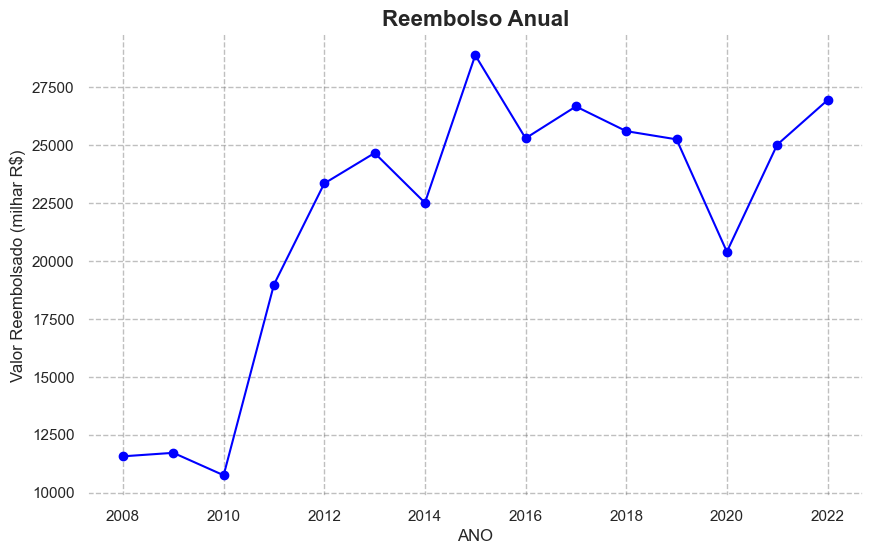

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ds_year_value is your DataFrame

# Set seaborn style
sns.set_theme()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(ds_year_value['ANO'], ds_year_value['VALOR_REEMBOLSADO'] / 1000, marker='o', linestyle='-', color='blue')

# Set title and labels
plt.title('Reembolso Anual', fontsize=16, fontweight='bold')
plt.xlabel('ANO')
plt.ylabel('Valor Reembolsado (milhar R$)')

# Remove background
plt.gca().set_facecolor('none')
plt.grid(False, axis='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()


In [ ]:
ds_year_value = dataset_corrected[['ANO','TIPO_DESPESA']].copy()
ds_year_value

ds_year_value = ds_year_value.groupby('ANO', as_index = False)['VALOR_REEMBOLSADO'].sum()
ds_year_value